In [2]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [32]:
import json
import pymongo
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
from bson import json_util
import seaborn as sns
np.random.seed(0)

#Read csv and convert in json

data_csv = pd.read_csv ("C:/Users/HP/Downloads/Healthcare_Cost_and_Utilization_Project__HCUP__-_National_Inpatient_Sample.csv")
data_csv.to_json("C:/Users/HP/Downloads/Healthcare_Cost_and_Utilization_Project__HCUP__-_National_Inpatient_Sample.json")
df=pd.read_json("C:/Users/HP/Downloads/Healthcare_Cost_and_Utilization_Project__HCUP__-_National_Inpatient_Sample.json")

data = df.to_dict('records')

#connection to MongoDB
myclient=pymongo.MongoClient("mongodb://localhost:27017/")
mydb=myclient["Healthcare_db"]
mycol = mydb.Healthcare_db

x=mycol.insert_many(data)
print(x)

In [6]:
#summary of statistics to the dataframe columns
df.describe()

,Year,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,LocationID,GeoLocation
count,1080.000000,1053.000000,1080.000000,1053.000000,1053.000000,1080.0,0.0
mean,2008.500000,5.311966,5.129167,5.096201,5.545774,59.0,NaN
std,2.873612,5.166394,5.227631,5.044033,5.298503,0.0,NaN
min,2004.000000,0.000000,-2.000000,0.000000,0.000000,59.0,NaN
25%,2006.000000,2.300000,2.200000,2.200000,2.400000,59.0,NaN
50%,2008.500000,3.600000,3.500000,3.400000,3.700000,59.0,NaN
75%,2011.000000,6.300000,6.200000,6.000000,6.700000,59.0,NaN
max,2013.000000,26.500000,26.500000,26.000000,27.100000,59.0,NaN


In [8]:
df.head()

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2005,US,United States,HCUP,None,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,...,Age,18-24,C1,T4,HC303,Crude,BOC03,AGE01,59,NaN
1,2013,US,United States,HCUP,None,None,None,None,Cardiovascular Diseases,Heart Failure,...,Gender,Male,C1,T5,HC503,Crude,BOC02,GEN01,59,NaN
2,2011,US,United States,HCUP,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Age,65+,C1,T1,HC101,Crude,BOC03,AGE06,59,NaN
3,2009,US,United States,HCUP,None,None,None,None,Cardiovascular Diseases,Stroke,...,Gender,Male,C1,T6,HC603,Crude,BOC02,GEN01,59,NaN
4,2013,US,United States,HCUP,None,None,Healthy People 2020,None,Cardiovascular Diseases,Heart Failure,...,Age,45-64,C1,T5,HC501,Crude,BOC03,AGE05,59,NaN


In [17]:
totalCells = np.product(df.shape)

In [18]:
missingCount = df.isnull().sum()


In [19]:
totalMissing = missingCount.sum()


In [22]:
#checking for missing values in the column 'Data_Value'

missingCount[['Data_Value']] 

Data_Value    27
dtype: int64

In [23]:
#removing all rows from the dataset which contains missing values
df.dropna()

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation


In [36]:
#performing imputations code from kaggle

imputedf = df.fillna(method='ffill', axis=0).fillna("0")

imputedf.head()

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Types_cardiovascular_diseases,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2005,US,United States,HCUP,None,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,...,Age,18-24,C1,T4,HC303,Crude,BOC03,AGE01,59,0
1,2013,US,United States,HCUP,None,None,None,None,Cardiovascular Diseases,Heart Failure,...,Gender,Male,C1,T5,HC503,Crude,BOC02,GEN01,59,0
2,2011,US,United States,HCUP,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Age,65+,C1,T1,HC101,Crude,BOC03,AGE06,59,0
3,2009,US,United States,HCUP,None,None,None,None,Cardiovascular Diseases,Stroke,...,Gender,Male,C1,T6,HC603,Crude,BOC02,GEN01,59,0
4,2013,US,United States,HCUP,None,None,Healthy People 2020,None,Cardiovascular Diseases,Heart Failure,...,Age,45-64,C1,T5,HC501,Crude,BOC03,AGE05,59,0


In [37]:
df.head()

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Types_cardiovascular_diseases,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2005,US,United States,HCUP,None,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,...,Age,18-24,C1,T4,HC303,Crude,BOC03,AGE01,59,NaN
1,2013,US,United States,HCUP,None,None,None,None,Cardiovascular Diseases,Heart Failure,...,Gender,Male,C1,T5,HC503,Crude,BOC02,GEN01,59,NaN
2,2011,US,United States,HCUP,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Age,65+,C1,T1,HC101,Crude,BOC03,AGE06,59,NaN
3,2009,US,United States,HCUP,None,None,None,None,Cardiovascular Diseases,Stroke,...,Gender,Male,C1,T6,HC603,Crude,BOC02,GEN01,59,NaN
4,2013,US,United States,HCUP,None,None,Healthy People 2020,None,Cardiovascular Diseases,Heart Failure,...,Age,45-64,C1,T5,HC501,Crude,BOC03,AGE05,59,NaN


In [26]:
#removing unwanted columns from the dataframe code from stackoverflow
df.drop(['LocationAbbr', 'DataSource','Data_Value_Footnote','GeoLocation'], axis = 1)


,Year,LocationDesc,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Data_Value_Type,...,HighConfidenceLimit,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
0,2005,United States,None,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,Prevalence of in-hospital mortality among coro...,Crude,...,NaN,Age,18-24,C1,T4,HC303,Crude,BOC03,AGE01,59
1,2013,United States,None,None,None,None,Cardiovascular Diseases,Heart Failure,Prevalence of in-hospital mortality among hear...,Crude,...,3.2,Gender,Male,C1,T5,HC503,Crude,BOC02,GEN01,59
2,2011,United States,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,Crude,...,22.6,Age,65+,C1,T1,HC101,Crude,BOC03,AGE06,59
3,2009,United States,None,None,None,None,Cardiovascular Diseases,Stroke,Prevalence of in-hospital mortality among cere...,Crude,...,6.7,Gender,Male,C1,T6,HC603,Crude,BOC02,GEN01,59
4,2013,United States,None,None,Healthy People 2020,None,Cardiovascular Diseases,Heart Failure,Prevalence of heart failure hospitalizations a...,Crude,...,2.4,Age,45-64,C1,T5,HC501,Crude,BOC03,AGE05,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,2009,United States,None,None,None,None,Cardiovascular Diseases,Diseases of the Heart (Heart Disease),Prevalence of all heart disease hospitalizatio...,Crude,...,14.7,Age,35+,C1,T2,HC201,Crude,BOC03,AGE07,59
1076,2012,United States,None,None,None,None,Cardiovascular Diseases,Heart Failure,Prevalence of in-hospital mortality among hear...,Crude,...,3.2,Overall,Overall,C1,T5,HC503,Crude,BOC01,OVR01,59
1077,2005,United States,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of in-hospital mortality among majo...,Crude,...,3.5,Gender,Male,C1,T1,HC103,Crude,BOC02,GEN01,59
1078,2006,United States,None,None,None,None,Cardiovascular Diseases,Stroke,Prevalence of in-hospital mortality among cere...,Crude,...,8.3,Age,65+,C1,T6,HC603,Crude,BOC03,AGE06,59


In [35]:
#renaming  columns in the existing dataframe code from stackoverflow
df.rename(columns={'Topic': 'Types_cardiovascular_diseases'}, inplace=True)
df.head()

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Types_cardiovascular_diseases,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2005,US,United States,HCUP,None,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,...,Age,18-24,C1,T4,HC303,Crude,BOC03,AGE01,59,NaN
1,2013,US,United States,HCUP,None,None,None,None,Cardiovascular Diseases,Heart Failure,...,Gender,Male,C1,T5,HC503,Crude,BOC02,GEN01,59,NaN
2,2011,US,United States,HCUP,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Age,65+,C1,T1,HC101,Crude,BOC03,AGE06,59,NaN
3,2009,US,United States,HCUP,None,None,None,None,Cardiovascular Diseases,Stroke,...,Gender,Male,C1,T6,HC603,Crude,BOC02,GEN01,59,NaN
4,2013,US,United States,HCUP,None,None,Healthy People 2020,None,Cardiovascular Diseases,Heart Failure,...,Age,45-64,C1,T5,HC501,Crude,BOC03,AGE05,59,NaN


<AxesSubplot:>

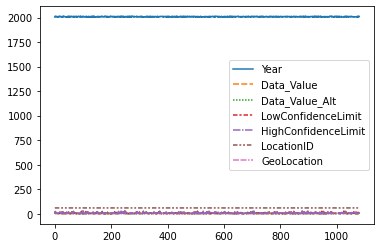

In [27]:
#VISUALIZATIONS  trying to analyse the dataset and  performing visualizations
#using different vizualizations
#lineplot 
sns.lineplot(data=df)


Text(0.5, 0, 'Year')

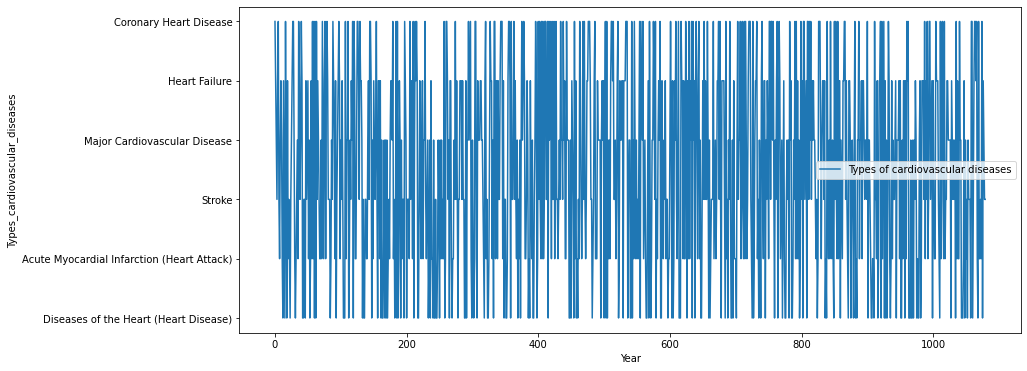

In [39]:

plt.figure(figsize=(14,6))
sns.lineplot(data=df['Types_cardiovascular_diseases'], label="Types of cardiovascular diseases")
plt.xlabel("Year")


<AxesSubplot:xlabel='Data_Value', ylabel='Types_cardiovascular_diseases'>

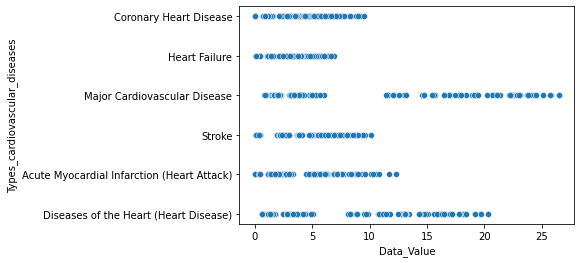

In [44]:
#scatterplot
sns.scatterplot(x=df['Data_Value'], y=df['Types_cardiovascular_diseases'])

<AxesSubplot:xlabel='Year', ylabel='Types_cardiovascular_diseases'>

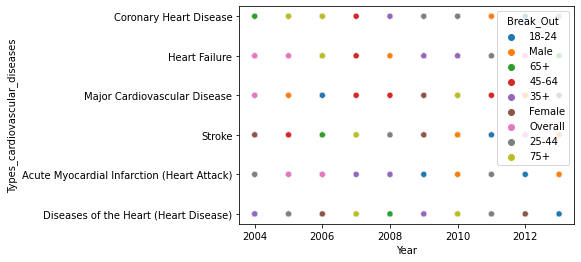

In [47]:
sns.scatterplot(x=df['Year'], y=df['Types_cardiovascular_diseases'], hue=df['Break_Out'])